### https://medium.com/nybles/create-your-first-image-recognition-classifier-using-cnn-keras-and-tensorflow-backend-6eaab98d14dd

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
# Display plots inline and change default figure size
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

### Building the network

In [3]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(filters=32, kernel_size=(3,3), strides=3, input_shape = (64, 64, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(128, activation = 'relu'))
classifier.add(Dense(1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Data Augmentation

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('D:/lh_data/CNN/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('D:/lh_data/CNN/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Training


Why do we need steps_per_epoch ?

Keep in mind that a Keras data generator is meant to loop infinitely — it should never return or exit.

Since the function is intended to loop infinitely, Keras has no ability to determine when one epoch starts and a new epoch begins.

Therefore, we compute the steps_per_epoch value as the total number of training data points divided by the batch size. Once Keras hits this step count it knows that it’s a new epoch.


8000 images / 32 pert batch_sizes =250 [steps per epoch]

In [5]:
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 250,
                         epochs = 10,
                         validation_data = test_set)

C:\Users\rivil\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
250/250 [==============================] - 145s 576ms/step - loss: 0.6837 - accuracy: 0.5560 - val_loss: 0.6109 - val_accuracy: 0.6720
Epoch 2/10
250/250 [==============================] - 23s 91ms/step - loss: 0.6082 - accuracy: 0.6691 - val_loss: 0.5971 - val_accuracy: 0.6900
Epoch 3/10
250/250 [==============================] - 23s 93ms/step - loss: 0.5887 - accuracy: 0.6844 - val_loss: 0.5973 - val_accuracy: 0.6825
Epoch 4/10
250/250 [==============================] - 24s 95ms/step - loss: 0.5487 - accuracy: 0.7192 - val_loss: 0.5369 - val_accuracy: 0.7260
Epoch 5/10
250/250 [==============================] - 24s 98ms/step - loss: 0.5438 - accuracy: 0.7232 - val_loss: 0.5827 - val_accuracy: 0.6970
Epoch 6/10
250/250 [==============================] - 26s 103ms/step - loss: 0.5208 - accuracy: 0.7356 - val_loss: 0.5418 - val_accuracy: 0.7345
Epoch 7/10
250/250 [==============================] - 25s 99ms/step - loss: 0.5111 - accuracy: 0.7466 - val_loss: 0.5202 - val_accura

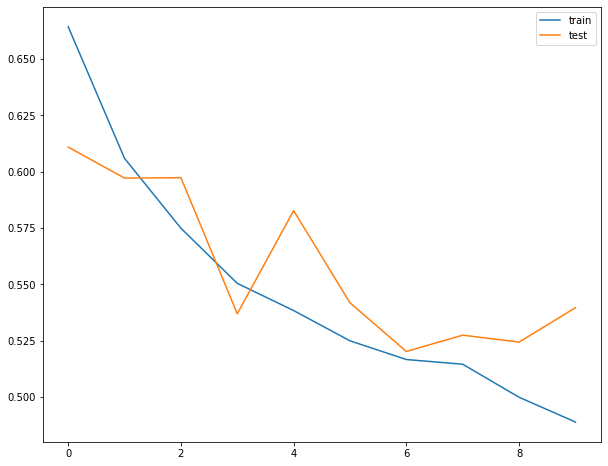

In [6]:
from matplotlib import pyplot as plt
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Testing

In [7]:
import numpy as np
from tensorflow.keras.preprocessing import image
# loading an image from the disk
test_image = image.load_img('C:/Users/rivil/OnGoing/CNN/Screenshot 2020-04-01 at 16.51.21.png', target_size = (64, 64))
# converting the image to a numpy array
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)  # predicting
# print(training_set.class_indices)
# our cut-off
if result[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)

dog


In [8]:
result

array([[1.]], dtype=float32)

In [9]:
test_image

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

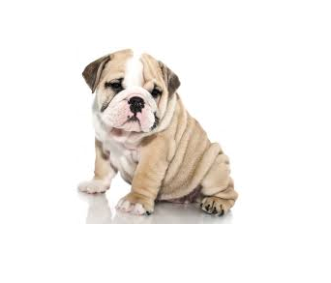